# Gauss-Jordan elimination

| Who  | Mail | Date | What |
| ---  | ---   | --- | ---      |
|Diego Andrés Alvarez Marín | <daalvarez@unal.edu.co>  | March 19th, 2025 | Initial code |

The Gauss-Jordan elimination method is a technique for solving systems of linear equations by transforming the augmented matrix into reduced row echelon form (RREF). This notebook demonstrates the implementation of the Gauss-Jordan elimination algorithm in Python and explores its applications, advantages, and limitations.

Applications of Gauss-Jordan Elimination:
1. Solving systems of linear equations
2. Finding the inverse of a matrix
3. Computing the rank of a matrix (homework)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import pandas as pd
import time

## 1. Mathematical Background

The Gauss-Jordan elimination transforms a system of linear equations into reduced row echelon form (RREF), allowing us to directly read off the solution. 

Given a system of linear equations in the form:
$$\begin{align}
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n &= b_1\\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n &= b_2\\
\vdots\\
a_{n1}x_1 + a_{n2}x_2 + \cdots + a_{nn}x_n &= b_n
\end{align}$$

We can represent this as an augmented matrix:
$$\begin{bmatrix} 
a_{11} & a_{12} & \cdots & a_{1n} & | & b_1 \\
a_{21} & a_{22} & \cdots & a_{2n} & | & b_2 \\
\vdots & \vdots & \ddots & \vdots & | & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn} & | & b_n
\end{bmatrix}$$

The goal is to transform this into:
$$\begin{bmatrix} 
1 & 0 & \cdots & 0 & | & c_1 \\
0 & 1 & \cdots & 0 & | & c_2 \\
\vdots & \vdots & \ddots & \vdots & | & \vdots \\
0 & 0 & \cdots & 1 & | & c_n
\end{bmatrix}$$

Where the solution is $x_1 = c_1, x_2 = c_2, \ldots, x_n = c_n$.

## 2. Implementation of the Gauss-Jordan elimination method

### 2.1 Visualization Functions

In [2]:
def print_matrix(matrix, precision=4):
    """Pretty print a matrix with a vertical line before the last column"""
    df = pd.DataFrame(np.round(matrix, precision))
    
    # Adjust the display
    pd.set_option('display.max_columns', None)  # print an unlimited number of columns
    pd.set_option('display.width', None)        # width of the display in characters
    
    # Apply the style to the last column
    def highlight_last_column(s):
        return ['background-color: lightblue' if s.name == df.columns[-1] else '' for _ in s]
    
    return df.style.apply(highlight_last_column, axis=0)

def print_system(A, b, precision=4):
    """Print the system of equations in a readable format"""
    n = len(b)
    equations = []
    
    for i in range(n):
        eq = ""
        for j in range(n):
            coef = round(A[i, j], precision)
            if j == 0:
                    eq += f"{coef: }x_{j+1}"
            else:
                if coef >= 0:
                    eq += f" + {coef}x_{j+1}"
                else:
                    eq += f" - {abs(coef)}x_{j+1}"
        eq += f" = {round(b[i], precision)}"
        equations.append(eq)
    
    for eq in equations:
        print(eq)

### 2.2 Implementation

In [3]:
def gauss_jordan_elimination(A, b, show_steps=False):
    """
    Solve a system of linear equations using Gauss-Jordan elimination.
    Can show intermediate steps of the augmented matrix.
    
    Parameters:
        A (numpy.ndarray): Coefficient matrix of shape (n, n)
        b (numpy.ndarray): Right-hand side vector of shape (n,)
        show_steps (bool): Whether to print intermediate steps
    
    Returns:
        numpy.ndarray: Solution vector x of shape (n,)
    """
    # Check if A is square
    n, m = A.shape
    if n != m:
        raise ValueError("Coefficient matrix A must be square")
    
    # Check if b has compatible dimensions
    if len(b) != m:
        raise ValueError("Dimensions of A and b must be compatible")
    
    # Create the augmented matrix [A|b]
    augmented = np.column_stack((A.astype(float), b.astype(float)))
   
    if show_steps:
        print("Initial augmented matrix:")
        display(print_matrix(augmented))
        print("-" * 40)
    
    # Forward elimination
    for i in range(n):
        # Find the pivot row (row with the largest absolute value in column i)
        pivot_row = i
        for j in range(i + 1, n):
            if abs(augmented[j, i]) > abs(augmented[pivot_row, i]):
                pivot_row = j
        
        # Swap the current row with the pivot row
        if pivot_row != i:
            augmented[[i, pivot_row]] = augmented[[pivot_row, i]]
            if show_steps:
                print(f"Swap rows {i+1} and {pivot_row+1}:")
                display(print_matrix(augmented))
                print("-" * 40)
        
        # Check if matrix is singular
        if abs(augmented[i, i]) < 1e-10:
            raise ValueError("Matrix is singular or nearly singular")
        
        # Scale the pivot row to make the pivot element 1
        pivot = augmented[i, i]
        augmented[i] = augmented[i] / pivot
        if show_steps:
            print(f"Scale row {i+1} by 1/{pivot:.4f}:")
            display(print_matrix(augmented))
            print("-" * 40)
        
        # Eliminate other rows
        for j in range(n):
            if j != i:
                factor = augmented[j, i]
                if abs(factor) > 1e-10:  # Only perform elimination if necessary
                    augmented[j] = augmented[j] - factor * augmented[i]
                    if show_steps:
                        print(f"Subtract {factor:.4f} times row {i+1} from row {j+1}:")
                        display(print_matrix(augmented))
                        print("-" * 40)
    
    # Extract the solution
    x = augmented[:, n]
    
    if show_steps:
        print("Final reduced row echelon form:")
        display(print_matrix(augmented))
        print("-" * 40)
    
    return x

## 3. Examples

### Example 1: Solving a simple 3x3 system

In [4]:
A = np.array([
    [ 2,  1, -1],
    [-3, -1,  2],
    [-2,  7,  2]
])

x = np.array([8, -11, -3])

b = A @ x

print("Simple 3x3 system:")
print_system(A, b)

print("\nCoefficient matrix A:")
print(A)
print("\nRight-hand side vector b:")
print(b)

print("\nAugmented system:")
print_matrix(np.column_stack((A, b)))

Simple 3x3 system:
 2x_1 + 1x_2 - 1x_3 = 8
-3x_1 - 1x_2 + 2x_3 = -19
-2x_1 + 7x_2 + 2x_3 = -99

Coefficient matrix A:
[[ 2  1 -1]
 [-3 -1  2]
 [-2  7  2]]

Right-hand side vector b:
[  8 -19 -99]

Augmented system:


,0,1,2,3
0,2,1,-1,8
1,-3,-1,2,-19
2,-2,7,2,-99


In [5]:
try:
    x = gauss_jordan_elimination(A, b)
    print("\nSolution using our Gauss-Jordan implementation:")
    print(x)
    
    # Verify the solution
    print("\nVerification A*x:")
    print(A @ x)
    
    # Compare with NumPy's built-in solver
    x_numpy = np.linalg.solve(A, b)
    print("\nSolution using NumPy's solver:")
    print(x_numpy)
    
    # Check if solutions are close
    print(f"\nOur solution matches NumPy's: {np.allclose(x, x_numpy)}")
    
except ValueError as error:
    print(f"Error: {error}")

# Condition number analysis
cond = np.linalg.cond(A)
print(f"\nCondition number of matrix: {cond:.2f}")
if cond < 100:
    print("The system is well-conditioned.")
else:
    print("The system is poorly conditioned, which may lead to numerical instability.")    


Solution using our Gauss-Jordan implementation:
[  8. -11.  -3.]

Verification A*x:
[  8. -19. -99.]

Solution using NumPy's solver:
[  8. -11.  -3.]

Our solution matches NumPy's: True

Condition number of matrix: 36.32
The system is well-conditioned.


In [6]:
x = gauss_jordan_elimination(A, b, show_steps=True)

Initial augmented matrix:


,0,1,2,3
0,2.000000,1.000000,-1.000000,8.000000
1,-3.000000,-1.000000,2.000000,-19.000000
2,-2.000000,7.000000,2.000000,-99.000000


----------------------------------------
Swap rows 1 and 2:


,0,1,2,3
0,-3.000000,-1.000000,2.000000,-19.000000
1,2.000000,1.000000,-1.000000,8.000000
2,-2.000000,7.000000,2.000000,-99.000000


----------------------------------------
Scale row 1 by 1/-3.0000:


,0,1,2,3
0,1.000000,0.333300,-0.666700,6.333300
1,2.000000,1.000000,-1.000000,8.000000
2,-2.000000,7.000000,2.000000,-99.000000


----------------------------------------
Subtract 2.0000 times row 1 from row 2:


,0,1,2,3
0,1.000000,0.333300,-0.666700,6.333300
1,0.000000,0.333300,0.333300,-4.666700
2,-2.000000,7.000000,2.000000,-99.000000


----------------------------------------
Subtract -2.0000 times row 1 from row 3:


,0,1,2,3
0,1.000000,0.333300,-0.666700,6.333300
1,0.000000,0.333300,0.333300,-4.666700
2,0.000000,7.666700,0.666700,-86.333300


----------------------------------------
Swap rows 2 and 3:


,0,1,2,3
0,1.000000,0.333300,-0.666700,6.333300
1,0.000000,7.666700,0.666700,-86.333300
2,0.000000,0.333300,0.333300,-4.666700


----------------------------------------
Scale row 2 by 1/7.6667:


,0,1,2,3
0,1.000000,0.333300,-0.666700,6.333300
1,0.000000,1.000000,0.087000,-11.260900
2,0.000000,0.333300,0.333300,-4.666700


----------------------------------------
Subtract 0.3333 times row 2 from row 1:


,0,1,2,3
0,1.000000,0.000000,-0.695700,10.087000
1,0.000000,1.000000,0.087000,-11.260900
2,0.000000,0.333300,0.333300,-4.666700


----------------------------------------
Subtract 0.3333 times row 2 from row 3:


,0,1,2,3
0,1.000000,0.000000,-0.695700,10.087000
1,0.000000,1.000000,0.087000,-11.260900
2,0.000000,0.000000,0.304300,-0.913000


----------------------------------------
Scale row 3 by 1/0.3043:


,0,1,2,3
0,1.000000,0.000000,-0.695700,10.087000
1,0.000000,1.000000,0.087000,-11.260900
2,0.000000,0.000000,1.000000,-3.000000


----------------------------------------
Subtract -0.6957 times row 3 from row 1:


,0,1,2,3
0,1.000000,0.000000,0.000000,8.000000
1,0.000000,1.000000,0.087000,-11.260900
2,0.000000,0.000000,1.000000,-3.000000


----------------------------------------
Subtract 0.0870 times row 3 from row 2:


,0,1,2,3
0,1.000000,0.000000,0.000000,8.000000
1,0.000000,1.000000,0.000000,-11.000000
2,0.000000,0.000000,1.000000,-3.000000


----------------------------------------
Final reduced row echelon form:


,0,1,2,3
0,1.000000,0.000000,0.000000,8.000000
1,0.000000,1.000000,0.000000,-11.000000
2,0.000000,0.000000,1.000000,-3.000000


----------------------------------------


### Example 2: Ill-conditioned system

In [7]:
A = np.array([
    [1, 1],
    [1, 1.000000000000000001]
])

b = np.array([2, 2.000000000000000001])

print("\n\nIll-conditioned system")
print("Coefficient matrix A:")
print(A)
print("\nRight-hand side vector b:")
print(b)

try:
    x = gauss_jordan_elimination(A, b)
    print("\nSolution using our Gauss-Jordan implementation:")
    print(x)
    
    # Verify the solution
    print("\nVerification A*x:")
    print(A @ x)
    
    # Compare with NumPy's built-in solver
    x_numpy = np.linalg.solve(A, b)
    print("\nSolution using NumPy's solver:")
    print(x_numpy)
    
except ValueError as error:
    print(f"Error: {error}")

# Condition number analysis
cond = np.linalg.cond(A)
print(f"\nCondition number of matrix: {cond:.2f}")
if cond < 100:
    print("The system is well-conditioned.")
else:
    print("The system is poorly conditioned, which may lead to numerical instability.")



Ill-conditioned system
Coefficient matrix A:
[[1. 1.]
 [1. 1.]]

Right-hand side vector b:
[2. 2.]
Error: Matrix is singular or nearly singular

Condition number of matrix: 59617770476389832.00
The system is poorly conditioned, which may lead to numerical instability.


## 4. Large System Performance

In [8]:
def compare_performance(sizes):
    """Compare performance of our implementation versus NumPy for different matrix sizes."""

    gj_times = []
    np_times = []
    gj_residuals = []
    np_residuals = []

    # Create a seed for reproducibility
    np.random.seed(42)

    for n in sizes:
        # Generate a random matrix
        A = np.random.rand(n, n)

        # Create a known solution
        x_true = np.random.rand(n) * 10

        # Compute the right-hand side
        b = A @ x_true

        # Time our implementation
        start = time.time()
        try:
            x_gj = gauss_jordan_elimination(A.copy(), b.copy())
            gj_time = time.time() - start
            gj_times.append(gj_time)

        except Exception as error:
            print(f"Gauss-Jordan failed: {error}")
            gj_times.append(np.nan)

        # Time NumPy's implementation
        start = time.time()
        x_np = np.linalg.solve(A, b)
        np_time = time.time() - start
        np_times.append(np_time)

        # Check if solution satisfies the original system
        gj_residuals.append(np.linalg.norm(A @ x_gj - b))
        np_residuals.append(np.linalg.norm(A @ x_np - b))

    # Pack all stats in a pandas' dataframe
    df = pd.DataFrame({
        'Size':           sizes,
        'Time GJ':        gj_times,
        'Time NumPy':     np_times,
        'Residual GJ':    gj_residuals,
        'Residual NumPy': np_residuals
    })
    return df

In [9]:
# Compare performance for matrices of different sizes
print("\n\nPerformance Comparison:")
sizes = [10, 20, 50, 100, 200, 500, 1000, 2000]
df = compare_performance(sizes)
display(df)



Performance Comparison:


,Size,Time GJ,Time NumPy,Residual GJ,Residual NumPy
0,10,0.000715,0.002306,1.507289e-14,5.024296e-15
1,20,0.001984,0.000138,1.145716e-13,2.751920e-14
2,50,0.016431,0.000297,1.510635e-13,1.406803e-13
3,100,0.067474,0.000317,3.896988e-13,4.167441e-13
4,200,0.158823,0.001837,2.392156e-12,4.249212e-12
5,500,0.877856,0.002649,2.230813e-11,3.827517e-11
6,1000,4.476434,0.010844,5.584512e-11,9.710959e-11
7,2000,25.490943,0.069459,1.027689e-10,5.957253e-10


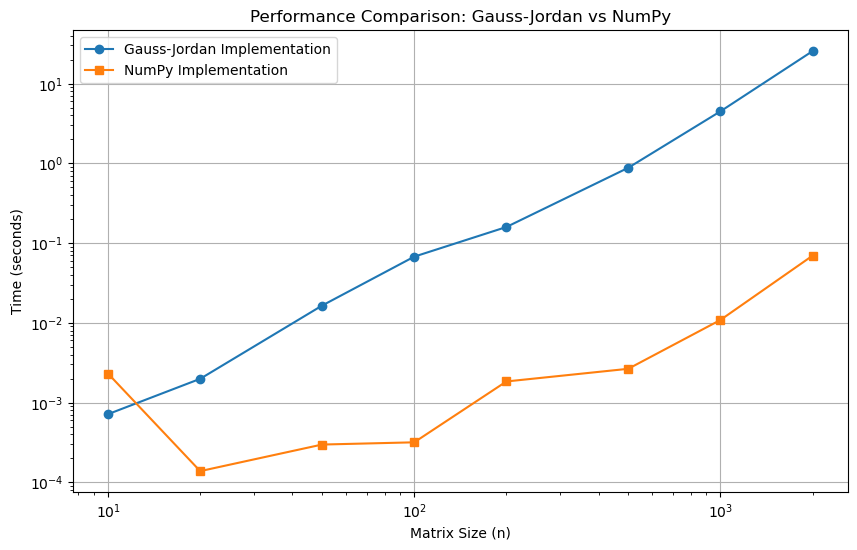

In [10]:
# Plot the performance comparison
gj_times = df['Time GJ']
np_times = df['Time NumPy']

plt.figure(figsize=(10, 6))
plt.plot(sizes, gj_times, 'o-', label='Gauss-Jordan Implementation')
plt.plot(sizes, np_times, 's-', label='NumPy Implementation')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: Gauss-Jordan vs NumPy')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

#k, log_a = np.polyfit(np.log(sizes), np.log(gj_times), 1)
#plt.plot(sizes, np.exp(log_a)*sizes**k)

plt.show()

When data follows a straight line in a log-log plot, it indicates that the relationship between the two variables adheres to a *power law*. Specifically, the data can be modeled by an equation of the form $y = ax^k$. To show that, take the logarithm of both sides of the power law equation transforms it into:
$$
   \log(y) = \log(a) + k\log(x)
$$
This is a linear equation where $k$ is the slope of the line and $\log(a)$ is the intercept.

In [11]:
k, log_a = np.polyfit(np.log(sizes), np.log(gj_times), 1)
print("k =", k)
print("a =", np.exp(log_a))

k = 1.941725133115873
a = 7.08870086881e-06


## 5. Computing the Inverse of a Matrix using Gauss-Jordan

In [12]:
def matrix_inverse_gauss_jordan(A):
    """
    Compute the inverse of a matrix using Gauss-Jordan elimination.
    
    Parameters:
    A (numpy.ndarray): Square matrix to invert
    
    Returns:
    numpy.ndarray: Inverse of matrix A    
    """
    # Check if A is square
    n, m = A.shape
    if n != m:
        raise ValueError("Coefficient matrix A must be square")
    
    n = len(A)
    # Create the augmented matrix [A|I]
    augmented = np.column_stack((A.astype(float), np.identity(n)))
    
    # Apply the same Gauss-Jordan elimination process
    for i in range(n):
        # Find the pivot row (row with the largest absolute value in column i)
        pivot_row = i
        for j in range(i + 1, n):
            if abs(augmented[j, i]) > abs(augmented[pivot_row, i]):
                pivot_row = j
        
        # Swap the current row with the pivot row
        if pivot_row != i:
            augmented[[i, pivot_row]] = augmented[[pivot_row, i]]
        
        # Check if matrix is singular
        if abs(augmented[i, i]) < 1e-10:
            raise ValueError("Matrix is singular or nearly singular, cannot compute inverse")
        
        # Scale the pivot row to make the pivot element 1
        pivot = augmented[i, i]
        augmented[i] = augmented[i] / pivot
        
        # Eliminate other rows
        for j in range(n):
            if j != i:
                factor = augmented[j, i]
                if abs(factor) > 1e-10:  # Only perform elimination if necessary
                    augmented[j] = augmented[j] - factor*augmented[i]
    
    # Extract the inverse matrix (right half of augmented matrix)
    inverse = augmented[:, n:2*n]
    
    return inverse

### Example: computing a matrix inverse

In [13]:
A = np.array([
    [ 2,  1, -1, 5],
    [-3, -1,  2, 4],
    [-2,  7,  2, 8],
    [ 4,  2,  1, 3],
])

print("\n\nExample: Computing a matrix inverse")
print("Original matrix:")
print(A)

try:
    inv_A = matrix_inverse_gauss_jordan(A)
    print("\nInverse using our Gauss-Jordan implementation:")
    print(inv_A)
    
    # Verify the inverse: A * A⁻¹ = I
    print("\nVerification A * A⁻¹:")
    print(A @ inv_A)
    
    # Compare with NumPy's built-in inverse
    numpy_inv_A = np.linalg.inv(A)
    print("\nInverse using NumPy:")
    print(numpy_inv_A)
    
    # Check if solutions are close
    print(f"\nOur inverse matches NumPy's: {np.allclose(inv_A, numpy_inv_A)}")
    
except ValueError as error:
    print(f"Error: {error}")



Example: Computing a matrix inverse
Original matrix:
[[ 2  1 -1  5]
 [-3 -1  2  4]
 [-2  7  2  8]
 [ 4  2  1  3]]

Inverse using our Gauss-Jordan implementation:
[[ 0.00711744 -0.03202847 -0.06049822  0.19217082]
 [-0.0747331  -0.16370107  0.13523132 -0.01779359]
 [-0.32206406  0.19928826 -0.01245552  0.30427046]
 [ 0.14768683  0.08540925 -0.00533808 -0.01245552]]

Verification A * A⁻¹:
[[ 1.00000000e+00  1.11022302e-16  0.00000000e+00  2.77555756e-17]
 [-1.11022302e-16  1.00000000e+00 -2.77555756e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  5.55111512e-17]
 [ 0.00000000e+00 -1.38777878e-17  0.00000000e+00  1.00000000e+00]]

Inverse using NumPy:
[[ 0.00711744 -0.03202847 -0.06049822  0.19217082]
 [-0.0747331  -0.16370107  0.13523132 -0.01779359]
 [-0.32206406  0.19928826 -0.01245552  0.30427046]
 [ 0.14768683  0.08540925 -0.00533808 -0.01245552]]

Our inverse matches NumPy's: True


## Advantages and Limitations

### Advantages of Gauss-Jordan Elimination:
* Direct method that provides exact solutions (barring numerical errors)
* Produces the inverse of the coefficient matrix as a by-product
* Conceptually straightforward and easy to implement
* Well-suited for small to medium-sized systems common in civil engineering
* Works well for well-conditioned matrices

### Limitations of Gauss-Jordan Elimination:
* Computationally expensive for large systems (O(n³) complexity for an n×n matrix)
* Susceptible to round-off errors, especially for ill-conditioned matrices
* Not as efficient as specialized algorithms for specific matrix types
* Requires pivoting to handle zero pivots and minimize numerical errors
* May encounter difficulties with nearly singular matrices
* Not suitable for very large sparse systems common in finite element analysis

## Alternative methods:
* LU Decomposition: More efficient for multiple right-hand sides
* Cholesky Decomposition: Faster for symmetric positive-definite matrices
* QR Decomposition: More stable for ill-conditioned systems
* Iterative Methods (Jacobi, Gauss-Seidel): Better for large sparse systems
* Conjugate Gradient: Efficient for large symmetric positive-definite systems

## Conclusions
* Gauss-Jordan elimination is a systematic approach to solve linear systems by transforming the augmented matrix to reduced row echelon form.
* The method can be implemented effectively in Python, but specialized libraries like NumPy provide more optimized implementations for large systems.
* It is suitable for small to medium-sized problems.
* Pivoting strategies (like partial pivoting) are crucial for numerical stability.
* The algorithm can be extended to compute matrix inverses and solve other linear algebra problems.
* For large systems, more specialized methods may be preferred